Combine the cleaned datasets from the "No Wegovy Members" notebook (control group) and "BOB_GLPWLA_Analysis" (treatment group) notebook to create PSM cohorts for comparison.

Read and import member data from treatment group.

In [1]:
import pandas as pd
glp_members = pd.read_csv('glp1_members_pdc65.csv')
glp_members.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,Rx_2024,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC
0,11963,OTHER,Subscriber,Female,45,Generation X,28.84625,1064.55685,1197.59001,464.60,...,0.00,-330.0807,-100.000000,-47.698107,1,6,4,4,3,8
1,18243,OTHER,Subscriber,Unknown,27,Generation Z,1416.36850,990.81251,933.73943,612.60,...,377.80,-633.7034,-62.649656,-237.078221,1,11,10,7,11,13
2,10799,NC,Dependent,Female,41,Millenials,892.09525,574.75235,1106.89605,185.24,...,452.59,-838.6639,-64.949573,-207.917341,1,8,9,12,7,13
3,15019,OTHER,Subscriber,Female,30,Millenials,298.80250,868.53452,501.52135,340.70,...,699.66,253.4216,56.790630,35.461015,1,3,7,7,7,7
4,12908,OTHER,Unknown,Male,59,Generation X,610.50650,1080.15017,145.12744,359.04,...,946.00,860.0771,1000.987048,225.761382,1,9,6,9,8,8


Assign binary variable to treatment group.

In [2]:
glp_members['GLP-1'] = 1
glp_members

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1
0,11963,OTHER,Subscriber,Female,45,Generation X,28.84625,1064.55685,1197.59001,464.60,...,-330.0807,-100.000000,-47.698107,1,6,4,4,3,8,1
1,18243,OTHER,Subscriber,Unknown,27,Generation Z,1416.36850,990.81251,933.73943,612.60,...,-633.7034,-62.649656,-237.078221,1,11,10,7,11,13,1
2,10799,NC,Dependent,Female,41,Millenials,892.09525,574.75235,1106.89605,185.24,...,-838.6639,-64.949573,-207.917341,1,8,9,12,7,13,1
3,15019,OTHER,Subscriber,Female,30,Millenials,298.80250,868.53452,501.52135,340.70,...,253.4216,56.790630,35.461015,1,3,7,7,7,7,1
4,12908,OTHER,Unknown,Male,59,Generation X,610.50650,1080.15017,145.12744,359.04,...,860.0771,1000.987048,225.761382,1,9,6,9,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,11306,NC,Dependent,Male,45,Generation X,91.47375,445.53779,54.67935,1073.18,...,-241.2467,-50.513697,-70.268856,1,4,3,5,2,4,1
313,13242,OTHER,Dependent,Unknown,47,Generation X,2124.72900,718.47674,225.80487,431.00,...,-1127.5129,-75.131318,-378.519813,1,7,6,5,8,4,1
314,17858,OTHER,Unknown,Female,28,Millenials,199.86750,86.80207,255.33065,1242.55,...,165.0026,111.921258,69.444698,1,6,6,4,4,3,1
315,10502,OTHER,Dependent,Male,62,Baby Boomers,164.13575,93.19131,2013.14080,730.81,...,-1075.8799,-70.782508,-341.114628,1,6,7,9,3,8,1


Import and read member data from controlled group

In [3]:
noglp_members = pd.read_csv('no-glp1-members-nofilter.csv')
noglp_members.columns= noglp_members.columns.str.replace(' ', '_')

Assign binary variable to control group, drop any duplicates if there are any.

In [4]:
noglp_members['GLP-1'] = 0
noglp_members.drop_duplicates(subset='MEMBER_ID', keep='first', inplace=True)
noglp_members

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1
0,15467,UT,Unknown,Female,58,Generation X,288.21575,272.79374,437.21031,1132.58,...,26.1208,11.119530,8.503555,1,6,9,7,8,5,0
1,15527,UT,Unknown,Male,17,Generation Z,305.28850,349.14069,251.43949,441.39,...,-590.7805,-44.363532,-136.999791,1,6,6,5,4,4,0
2,19284,TX,Dependent,Female,47,Generation X,852.11000,1802.32418,162.02833,285.16,...,12.6481,2.930298,50.398843,1,10,5,10,8,12,0
3,15766,FL,Unknown,Unknown,60,Baby Boomers,1188.03075,1370.78240,630.69931,18.91,...,565.8796,636.746993,122.889321,1,6,6,8,5,5,0
4,16010,CA,Spouse,Male,22,Generation Z,278.05200,151.04074,1034.92028,101.33,...,377.3179,73.493642,47.880281,1,3,3,4,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,18092,WA,Spouse,Unknown,46,Generation X,416.40825,677.82911,34.07972,31.33,...,-635.3326,-78.291854,-176.174779,1,4,3,1,4,2,0
1194,17695,PA,Domestic Partner,Female,63,Baby Boomers,95.99750,283.58396,1136.25079,46.65,...,-455.1868,-94.606524,-158.746682,1,2,7,7,7,5,0
1195,14113,IL,Domestic Partner,Male,67,Baby Boomers,712.55525,343.39931,3052.09121,674.72,...,351.5771,104.594671,92.630444,1,7,8,10,11,13,0
1196,15819,FL,Spouse,Female,43,Millenials,1020.26425,723.38037,1242.37042,73.18,...,318.8015,858.412429,77.887536,1,8,9,11,7,11,0


Combine treatment and control group into one dataframe.

In [5]:
comb_members = pd.concat([glp_members,noglp_members], ignore_index=True)
comb_members

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1
0,11963,OTHER,Subscriber,Female,45,Generation X,28.84625,1064.55685,1197.59001,464.60,...,-330.0807,-100.000000,-47.698107,1,6,4,4,3,8,1
1,18243,OTHER,Subscriber,Unknown,27,Generation Z,1416.36850,990.81251,933.73943,612.60,...,-633.7034,-62.649656,-237.078221,1,11,10,7,11,13,1
2,10799,NC,Dependent,Female,41,Millenials,892.09525,574.75235,1106.89605,185.24,...,-838.6639,-64.949573,-207.917341,1,8,9,12,7,13,1
3,15019,OTHER,Subscriber,Female,30,Millenials,298.80250,868.53452,501.52135,340.70,...,253.4216,56.790630,35.461015,1,3,7,7,7,7,1
4,12908,OTHER,Unknown,Male,59,Generation X,610.50650,1080.15017,145.12744,359.04,...,860.0771,1000.987048,225.761382,1,9,6,9,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,18092,WA,Spouse,Unknown,46,Generation X,416.40825,677.82911,34.07972,31.33,...,-635.3326,-78.291854,-176.174779,1,4,3,1,4,2,0
1511,17695,PA,Domestic Partner,Female,63,Baby Boomers,95.99750,283.58396,1136.25079,46.65,...,-455.1868,-94.606524,-158.746682,1,2,7,7,7,5,0
1512,14113,IL,Domestic Partner,Male,67,Baby Boomers,712.55525,343.39931,3052.09121,674.72,...,351.5771,104.594671,92.630444,1,7,8,10,11,13,0
1513,15819,FL,Spouse,Female,43,Millenials,1020.26425,723.38037,1242.37042,73.18,...,318.8015,858.412429,77.887536,1,8,9,11,7,11,0


Export combined member level dataset to csv.

In [6]:
comb_members.to_csv('combined_members_for_study_nofilter.csv', index=False)

In [7]:
comb_members.columns

Index(['MEMBER_ID', 'HOME_STATE', 'MEMBER_RELATIONSHIP', 'GENDER', 'Age',
       'GENERATIONS', 'Med_2021', 'Med_2022', 'Med_2023', 'Med_2024',
       'Med_Delta', 'Med_%_Change', 'Med_Slope', 'Rx_2021', 'Rx_2022',
       'Rx_2023', 'Rx_2024', 'Rx_Delta', 'Rx_%_Change', 'Rx_Slope',
       'DX_IS_CHRONIC', 'ER_VISIT_FLAG', 'IS_PCP_VISIT',
       'IS_URGENT_CARE_VISIT', 'IS_PREVENTIVE_VISIT', 'IP_ADMIT_INC', 'GLP-1'],
      dtype='object')

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

Rewvieing counts by state. Initially ran this in case we wanted to use location as a covariate, but determined later not to use as it was harder to match pairs.

In [9]:
comb_members['HOME_STATE'].value_counts()

HOME_STATE
OTHER    228
TX       160
NC       152
PA       144
CO       133
UT       131
FL       129
IL       123
NY       110
WA       105
CA       100
Name: count, dtype: int64

In [10]:
# Define the states to keep
states_to_keep = ['NC', 'PA', 'TX', 'FL', 'VA', 'NJ', 'SD']
comb_members['HOME_STATE'] = comb_members['HOME_STATE'].apply(lambda x: x if x in states_to_keep else 'OTHER')

Get dummy columns for categorical variables so that they can be used in regression analysis for PSM.

In [11]:
comb_members_encoded = pd.get_dummies(comb_members, columns=['GENDER', 'MEMBER_RELATIONSHIP','HOME_STATE', 'GENERATIONS'], drop_first=True)
comb_members_encoded

,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,...,MEMBER_RELATIONSHIP_Spouse,MEMBER_RELATIONSHIP_Subscriber,MEMBER_RELATIONSHIP_Unknown,HOME_STATE_NC,HOME_STATE_OTHER,HOME_STATE_PA,HOME_STATE_TX,GENERATIONS_Generation X,GENERATIONS_Generation Z,GENERATIONS_Millenials
0,11963,45,28.84625,1064.55685,1197.59001,464.60,435.75375,1510.607965,144.029441,330.0807,...,False,True,False,False,True,False,False,True,False,False
1,18243,27,1416.36850,990.81251,933.73943,612.60,-803.76850,-56.748544,-246.837858,1011.5034,...,False,True,False,False,True,False,False,False,True,False
2,10799,41,892.09525,574.75235,1106.89605,185.24,-706.85525,-79.235401,-158.842205,1291.2539,...,False,False,False,True,False,False,False,False,False,True
3,15019,30,298.80250,868.53452,501.52135,340.70,41.89750,14.021804,-24.132067,446.2384,...,False,True,False,False,True,False,False,False,False,True
4,12908,59,610.50650,1080.15017,145.12744,359.04,-251.46650,-41.189815,-168.942223,85.9229,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,18092,46,416.40825,677.82911,34.07972,31.33,-385.07825,-92.476134,-179.898414,811.4926,...,True,False,False,False,True,False,False,True,False,False
1511,17695,63,95.99750,283.58396,1136.25079,46.65,-49.34750,-51.404985,70.462433,481.1368,...,False,False,False,False,False,True,False,False,False,False
1512,14113,67,712.55525,343.39931,3052.09121,674.72,-37.83525,-5.309799,259.518615,336.1329,...,False,False,False,False,True,False,False,False,False,False
1513,15819,43,1020.26425,723.38037,1242.37042,73.18,-947.08425,-92.827348,-232.226270,37.1385,...,True,False,False,False,False,False,False,False,False,True


In [12]:
comb_members_encoded.columns

Index(['MEMBER_ID', 'Age', 'Med_2021', 'Med_2022', 'Med_2023', 'Med_2024',
       'Med_Delta', 'Med_%_Change', 'Med_Slope', 'Rx_2021', 'Rx_2022',
       'Rx_2023', 'Rx_2024', 'Rx_Delta', 'Rx_%_Change', 'Rx_Slope',
       'DX_IS_CHRONIC', 'ER_VISIT_FLAG', 'IS_PCP_VISIT',
       'IS_URGENT_CARE_VISIT', 'IS_PREVENTIVE_VISIT', 'IP_ADMIT_INC', 'GLP-1',
       'GENDER_Male', 'GENDER_Unknown', 'MEMBER_RELATIONSHIP_Domestic Partner',
       'MEMBER_RELATIONSHIP_Spouse', 'MEMBER_RELATIONSHIP_Subscriber',
       'MEMBER_RELATIONSHIP_Unknown', 'HOME_STATE_NC', 'HOME_STATE_OTHER',
       'HOME_STATE_PA', 'HOME_STATE_TX', 'GENERATIONS_Generation X',
       'GENERATIONS_Generation Z', 'GENERATIONS_Millenials'],
      dtype='object')

Begin propensity score matching, comments included in code. Design regression analysis based on Age, Male, (T/F), Subscriber (T/F), and Spouse (T/F)

In [13]:
# Define the independent variables (covariates)
x = comb_members_encoded[['Age','GENDER_Male', 'MEMBER_RELATIONSHIP_Spouse',
       'MEMBER_RELATIONSHIP_Subscriber',
                         ]]
y = comb_members_encoded['GLP-1']

# Fit the logistic regression model
logit = LogisticRegression()
logit.fit(x, y)

# Predict propensity scores
comb_members_encoded['propensity_score'] = logit.predict_proba(x)[:, 1]
comb_members_encoded

,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,...,MEMBER_RELATIONSHIP_Subscriber,MEMBER_RELATIONSHIP_Unknown,HOME_STATE_NC,HOME_STATE_OTHER,HOME_STATE_PA,HOME_STATE_TX,GENERATIONS_Generation X,GENERATIONS_Generation Z,GENERATIONS_Millenials,propensity_score
0,11963,45,28.84625,1064.55685,1197.59001,464.60,435.75375,1510.607965,144.029441,330.0807,...,True,False,False,True,False,False,True,False,False,0.185004
1,18243,27,1416.36850,990.81251,933.73943,612.60,-803.76850,-56.748544,-246.837858,1011.5034,...,True,False,False,True,False,False,False,True,False,0.200697
2,10799,41,892.09525,574.75235,1106.89605,185.24,-706.85525,-79.235401,-158.842205,1291.2539,...,False,False,True,False,False,False,False,False,True,0.209642
3,15019,30,298.80250,868.53452,501.52135,340.70,41.89750,14.021804,-24.132067,446.2384,...,True,False,False,True,False,False,False,False,True,0.198014
4,12908,59,610.50650,1080.15017,145.12744,359.04,-251.46650,-41.189815,-168.942223,85.9229,...,False,True,False,True,False,False,True,False,False,0.205351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,18092,46,416.40825,677.82911,34.07972,31.33,-385.07825,-92.476134,-179.898414,811.4926,...,False,False,False,True,False,False,True,False,False,0.221889
1511,17695,63,95.99750,283.58396,1136.25079,46.65,-49.34750,-51.404985,70.462433,481.1368,...,False,False,False,False,True,False,False,False,False,0.189945
1512,14113,67,712.55525,343.39931,3052.09121,674.72,-37.83525,-5.309799,259.518615,336.1329,...,False,False,False,True,False,False,False,False,False,0.198132
1513,15819,43,1020.26425,723.38037,1242.37042,73.18,-947.08425,-92.827348,-232.226270,37.1385,...,False,False,False,False,False,False,False,False,True,0.224805


Check that count of unique members matches the above count of rows.

In [14]:
comb_members_encoded['MEMBER_ID'].nunique()

1469

Review box plot for range of propensity scores for treatment group.

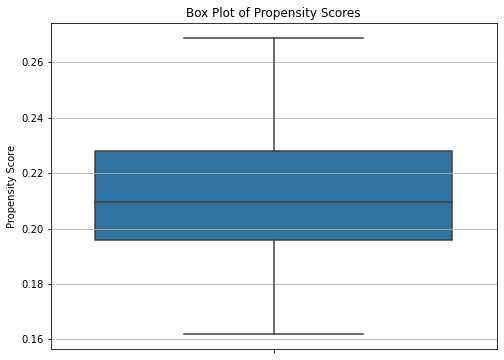

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data = comb_members_encoded[comb_members_encoded['GLP-1'] == 1]

# Create a box plot for propensity scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data['propensity_score'])
plt.title('Box Plot of Propensity Scores')
plt.ylabel('Propensity Score')
plt.grid(axis='y')
plt.show()

Review box plot for range of propensity scores for control group.

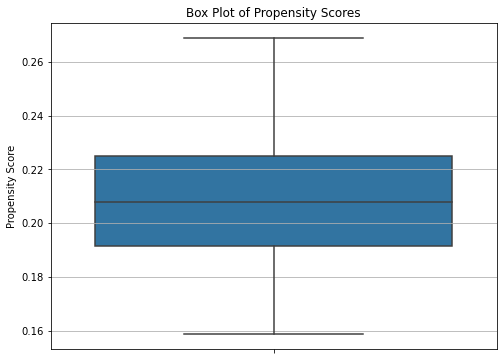

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data0 = comb_members_encoded[comb_members_encoded['GLP-1'] == 0]

# Create a box plot for propensity scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data0['propensity_score'])
plt.title('Box Plot of Propensity Scores')
plt.ylabel('Propensity Score')
plt.grid(axis='y')
plt.show()

Run Propensity Score Matching technique.

In [17]:
# Separate treated and control groups
treated = comb_members_encoded[comb_members_encoded['GLP-1'] == 1]
control = comb_members_encoded[comb_members_encoded['GLP-1'] == 0]

matched_pairs = []
# Perform matching
for index, treated_row in treated.iterrows():
    # Calculate the distance to all control units
    control['distance'] = (control['propensity_score'] - treated_row['propensity_score']).abs()
    
    # Find the closest control unit
    closest_control_index = control['distance'].idxmin()
    closest_control = control.loc[closest_control_index]
    
    # Append the matched pair
    matched_pairs.append((treated_row, closest_control))
    
    # remove the matched control from the control DataFrame
    control = control.drop(closest_control_index)  # Uncomment this line if you want to prevent re-matching

# Create a DataFrame from the matched pairs
matched_rows = []

for treated_row, control_row in matched_pairs:
    matched_rows.append(treated_row)  # Append treated row
    matched_rows.append(control_row)   # Append the matched control row

# Create a DataFrame from the list of matched rows
matched_df1 = pd.DataFrame(matched_rows).reset_index(drop=True)
matched_df1

/var/folders/qy/w1846_ms6g97cvq51vdv9qrr0000gn/T/ipykernel_49580/82983928.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['distance'] = (control['propensity_score'] - treated_row['propensity_score']).abs()


,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,...,MEMBER_RELATIONSHIP_Unknown,HOME_STATE_NC,HOME_STATE_OTHER,HOME_STATE_PA,HOME_STATE_TX,GENERATIONS_Generation X,GENERATIONS_Generation Z,GENERATIONS_Millenials,propensity_score,distance
0,11963,45,28.84625,1064.55685,1197.59001,464.60,435.75375,1510.607965,144.029441,330.0807,...,False,False,True,False,False,True,False,False,0.185004,NaN
1,12225,45,1085.82925,773.57835,812.87829,434.51,-651.31925,-59.983579,-191.465781,295.5360,...,False,False,True,False,False,True,False,False,0.185004,0.0
2,18243,27,1416.36850,990.81251,933.73943,612.60,-803.76850,-56.748544,-246.837858,1011.5034,...,False,False,True,False,False,False,True,False,0.200697,NaN
3,16017,27,1205.12700,128.23160,1210.09731,183.66,-1021.46700,-84.760112,-198.253529,37.7542,...,False,False,True,False,False,False,True,False,0.200697,0.0
4,10799,41,892.09525,574.75235,1106.89605,185.24,-706.85525,-79.235401,-158.842205,1291.2539,...,False,True,False,False,False,False,False,True,0.209642,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,18266,28,688.85550,628.59175,1325.73104,501.74,-187.11550,-27.163244,13.579279,248.0092,...,False,False,True,False,False,False,False,True,0.221967,0.0
630,10502,62,164.13575,93.19131,2013.14080,730.81,566.67425,345.247303,361.997224,1519.9799,...,False,False,True,False,False,False,False,False,0.202621,NaN
631,10758,62,2440.22825,1084.71870,1316.30246,526.95,-1913.27825,-78.405709,-550.825099,979.3560,...,False,False,False,False,False,False,False,False,0.202621,0.0
632,17555,32,345.17975,743.28531,1508.45521,455.46,110.28025,31.948644,109.601065,1343.6932,...,True,True,False,False,False,False,False,True,0.231140,NaN


Check to make sure each member is only counted once to ensure no members were matched more than once. There should be 522 members (261 *2)

In [18]:
matched_df1['MEMBER_ID'].value_counts()

MEMBER_ID
18520    2
15259    2
11073    2
16216    2
14527    2
        ..
12957    1
15566    1
14035    1
10547    1
17034    1
Name: count, Length: 624, dtype: int64

Locate PSM cohort members to original member aggegrate claims dataset and use only those members info for study.

In [19]:
matched_members = matched_df1['MEMBER_ID']
matched_members_study = comb_members[comb_members['MEMBER_ID'].isin(matched_members)]
matched_members_study

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1
0,11963,OTHER,Subscriber,Female,45,Generation X,28.84625,1064.55685,1197.59001,464.60,...,-330.0807,-100.000000,-47.698107,1,6,4,4,3,8,1
1,18243,OTHER,Subscriber,Unknown,27,Generation Z,1416.36850,990.81251,933.73943,612.60,...,-633.7034,-62.649656,-237.078221,1,11,10,7,11,13,1
2,10799,NC,Dependent,Female,41,Millenials,892.09525,574.75235,1106.89605,185.24,...,-838.6639,-64.949573,-207.917341,1,8,9,12,7,13,1
3,15019,OTHER,Subscriber,Female,30,Millenials,298.80250,868.53452,501.52135,340.70,...,253.4216,56.790630,35.461015,1,3,7,7,7,7,1
4,12908,OTHER,Unknown,Male,59,Generation X,610.50650,1080.15017,145.12744,359.04,...,860.0771,1000.987048,225.761382,1,9,6,9,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,14241,PA,Domestic Partner,Male,34,Millenials,874.00025,1724.63683,1059.36831,582.78,...,27.8862,9.504052,-3.355311,1,14,11,12,12,10,0
1501,14506,OTHER,Unknown,Male,39,Millenials,994.26150,3168.94017,3020.34191,571.95,...,-120.7195,-21.065788,10.005551,1,17,16,14,20,16,0
1508,12447,OTHER,Subscriber,Male,23,Generation Z,2165.53675,1856.90080,1962.95125,1376.60,...,355.4593,179.733044,37.899060,1,14,14,16,17,17,0
1512,14113,OTHER,Domestic Partner,Male,67,Baby Boomers,712.55525,343.39931,3052.09121,674.72,...,351.5771,104.594671,92.630444,1,7,8,10,11,13,0


Create a column that calculates the difference betwwen medical and pharmcy differences for each member from 2021 - 2024.

In [20]:
matched_members_study['MedRx_2021-2024_Diff'] = matched_members_study['Rx_Delta'] + matched_members_study['Med_Delta']
matched_members_study

/var/folders/qy/w1846_ms6g97cvq51vdv9qrr0000gn/T/ipykernel_49580/737944235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_members_study['MedRx_2021-2024_Diff'] = matched_members_study['Rx_Delta'] + matched_members_study['Med_Delta']


,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1,MedRx_2021-2024_Diff
0,11963,OTHER,Subscriber,Female,45,Generation X,28.84625,1064.55685,1197.59001,464.60,...,-100.000000,-47.698107,1,6,4,4,3,8,1,105.67305
1,18243,OTHER,Subscriber,Unknown,27,Generation Z,1416.36850,990.81251,933.73943,612.60,...,-62.649656,-237.078221,1,11,10,7,11,13,1,-1437.47190
2,10799,NC,Dependent,Female,41,Millenials,892.09525,574.75235,1106.89605,185.24,...,-64.949573,-207.917341,1,8,9,12,7,13,1,-1545.51915
3,15019,OTHER,Subscriber,Female,30,Millenials,298.80250,868.53452,501.52135,340.70,...,56.790630,35.461015,1,3,7,7,7,7,1,295.31910
4,12908,OTHER,Unknown,Male,59,Generation X,610.50650,1080.15017,145.12744,359.04,...,1000.987048,225.761382,1,9,6,9,8,8,1,608.61060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,14241,PA,Domestic Partner,Male,34,Millenials,874.00025,1724.63683,1059.36831,582.78,...,9.504052,-3.355311,1,14,11,12,12,10,0,-263.33405
1501,14506,OTHER,Unknown,Male,39,Millenials,994.26150,3168.94017,3020.34191,571.95,...,-21.065788,10.005551,1,17,16,14,20,16,0,-543.03100
1508,12447,OTHER,Subscriber,Male,23,Generation Z,2165.53675,1856.90080,1962.95125,1376.60,...,179.733044,37.899060,1,14,14,16,17,17,0,-433.47745
1512,14113,OTHER,Domestic Partner,Male,67,Baby Boomers,712.55525,343.39931,3052.09121,674.72,...,104.594671,92.630444,1,7,8,10,11,13,0,313.74185


Split into treatment and control groups.

In [21]:
treatment = matched_members_study[matched_members_study['GLP-1'] == 1]
controlled = matched_members_study[matched_members_study['GLP-1'] == 0]

In [22]:
treatment

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1,MedRx_2021-2024_Diff
0,11963,OTHER,Subscriber,Female,45,Generation X,28.84625,1064.55685,1197.59001,464.60,...,-100.000000,-47.698107,1,6,4,4,3,8,1,105.67305
1,18243,OTHER,Subscriber,Unknown,27,Generation Z,1416.36850,990.81251,933.73943,612.60,...,-62.649656,-237.078221,1,11,10,7,11,13,1,-1437.47190
2,10799,NC,Dependent,Female,41,Millenials,892.09525,574.75235,1106.89605,185.24,...,-64.949573,-207.917341,1,8,9,12,7,13,1,-1545.51915
3,15019,OTHER,Subscriber,Female,30,Millenials,298.80250,868.53452,501.52135,340.70,...,56.790630,35.461015,1,3,7,7,7,7,1,295.31910
4,12908,OTHER,Unknown,Male,59,Generation X,610.50650,1080.15017,145.12744,359.04,...,1000.987048,225.761382,1,9,6,9,8,8,1,608.61060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,11306,NC,Dependent,Male,45,Generation X,91.47375,445.53779,54.67935,1073.18,...,-50.513697,-70.268856,1,4,3,5,2,4,1,740.45955
313,13242,OTHER,Dependent,Unknown,47,Generation X,2124.72900,718.47674,225.80487,431.00,...,-75.131318,-378.519813,1,7,6,5,8,4,1,-2821.24190
314,17858,OTHER,Unknown,Female,28,Millenials,199.86750,86.80207,255.33065,1242.55,...,111.921258,69.444698,1,6,6,4,4,3,1,1207.68510
315,10502,OTHER,Dependent,Male,62,Baby Boomers,164.13575,93.19131,2013.14080,730.81,...,-70.782508,-341.114628,1,6,7,9,3,8,1,-509.20565


In [23]:
treatment['MEMBER_ID'].nunique()

317

In [24]:
controlled['MEMBER_ID'].nunique()

353

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  

In [26]:
controlled

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,Rx_2022,Rx_2023,Rx_2024,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1,MedRx_2021-2024_Diff
317,15467,OTHER,Unknown,Female,58,Generation X,288.22,272.79,437.21,1132.58,844.36,292.96,269.75,234.91,0.00,6.67,261.03,26.12,11.12,8.50,1,6,9,7,8,5,0,870.49
318,15527,OTHER,Unknown,Male,17,Generation Z,305.29,349.14,251.44,441.39,136.10,44.58,31.06,1331.68,142.02,544.36,740.90,-590.78,-44.36,-137.00,1,6,6,5,4,4,0,-454.68
319,19284,TX,Dependent,Female,47,Generation X,852.11,1802.32,162.03,285.16,-566.95,-66.53,-334.11,431.63,27.78,493.82,444.28,12.65,2.93,50.40,1,10,5,10,8,12,0,-554.30
320,15766,FL,Unknown,Unknown,60,Baby Boomers,1188.03,1370.78,630.70,18.91,-1169.12,-98.41,-424.74,88.87,619.27,150.53,654.75,565.88,636.75,122.89,1,6,6,8,5,5,0,-603.24
323,16618,OTHER,Subscriber,Unknown,62,Baby Boomers,409.83,0.00,514.32,0.00,-409.83,-100.00,-71.52,0.00,205.28,0.00,445.52,445.52,0.00,113.13,1,5,6,6,5,6,0,35.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,14241,PA,Domestic Partner,Male,34,Millenials,874.00,1724.64,1059.37,582.78,-291.22,-33.32,-153.89,293.41,278.72,161.51,321.30,27.89,9.50,-3.36,1,14,11,12,12,10,0,-263.33
1501,14506,OTHER,Unknown,Male,39,Millenials,994.26,3168.94,3020.34,571.95,-422.31,-42.47,-141.55,573.06,91.13,553.34,452.34,-120.72,-21.07,10.01,1,17,16,14,20,16,0,-543.03
1508,12447,OTHER,Subscriber,Male,23,Generation Z,2165.54,1856.90,1962.95,1376.60,-788.94,-36.43,-226.08,197.77,913.39,226.00,553.23,355.46,179.73,37.90,1,14,14,16,17,17,0,-433.48
1512,14113,OTHER,Domestic Partner,Male,67,Baby Boomers,712.56,343.40,3052.09,674.72,-37.84,-5.31,259.52,336.13,210.47,82.04,687.71,351.58,104.59,92.63,1,7,8,10,11,13,0,313.74


Review descriptive stats for treatment and control groups.

In [27]:
controlled.describe()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,Rx_2022,Rx_2023,Rx_2024,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1,MedRx_2021-2024_Diff
count,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,351.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00,353.00
mean,15238.63,44.90,741.73,731.26,751.05,642.62,-99.11,inf,-27.76,334.35,328.18,277.18,277.82,-56.53,1258.42,-22.06,0.99,6.46,6.47,6.74,6.66,6.63,0.00,-155.64
std,2897.32,19.05,644.77,660.61,645.79,605.58,733.82,NaN,239.60,309.18,279.80,266.07,237.22,390.67,16874.71,124.25,0.08,4.00,4.16,4.02,4.31,4.03,0.00,793.69
min,10010.00,13.00,0.00,0.00,0.00,0.00,-2851.20,-100.00,-867.19,0.00,0.00,0.00,0.00,-1635.21,-100.00,-592.92,0.00,1.00,0.00,0.00,0.00,1.00,0.00,-2640.93
25%,12894.00,30.00,248.79,194.93,251.27,185.27,-514.19,-72.02,-184.72,119.25,126.05,68.78,90.29,-248.78,-72.62,-90.58,1.00,4.00,4.00,4.00,4.00,4.00,0.00,-614.39
50%,15527.00,44.00,608.36,535.75,593.18,480.59,-80.15,-18.43,-17.63,249.88,266.92,206.56,229.18,-32.62,-14.08,-13.96,1.00,5.00,6.00,6.00,6.00,6.00,0.00,-135.54
75%,17774.00,61.00,1090.95,1079.90,1080.33,951.15,357.15,105.73,123.53,476.97,451.79,416.76,415.47,169.00,69.58,53.13,1.00,8.00,8.00,9.00,8.00,9.00,0.00,329.15
max,19989.00,79.00,4459.24,3168.94,3803.38,3880.77,2586.76,inf,800.01,1759.09,1496.14,2004.21,1205.55,974.61,306777.50,312.01,1.00,24.00,31.00,27.00,26.00,24.00,0.00,2486.66


In [28]:
treatment.describe()

,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,Rx_2022,Rx_2023,Rx_2024,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,GLP-1,MedRx_2021-2024_Diff
count,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00
mean,14788.67,44.64,895.03,766.87,777.16,745.83,-142.05,165.39,-43.73,726.51,601.78,587.76,518.62,-207.89,143.39,-63.77,1.00,7.21,7.37,7.19,7.17,7.45,1.00,-349.94
std,2882.99,19.00,689.18,551.35,555.59,518.93,873.49,978.48,276.35,535.65,459.26,415.78,344.60,658.49,886.15,207.85,0.00,2.26,2.39,2.34,2.50,2.47,0.00,1130.30
min,10004.00,13.00,0.00,0.00,0.00,0.00,-3930.68,-99.41,-1117.71,0.00,0.00,0.00,0.00,-3408.62,-100.00,-1081.87,1.00,3.00,2.00,3.00,0.00,1.00,1.00,-4979.91
25%,12236.00,30.00,395.48,391.24,348.39,353.17,-670.96,-59.00,-209.05,347.77,252.79,268.23,252.08,-579.85,-65.89,-185.01,1.00,6.00,5.00,5.00,5.00,6.00,1.00,-1042.01
50%,14925.00,42.00,743.15,653.39,650.96,656.74,-58.25,-10.02,-24.13,627.74,528.88,527.22,444.10,-147.65,-26.72,-44.76,1.00,7.00,8.00,7.00,7.00,7.00,1.00,-258.19
75%,17187.00,61.00,1228.06,1025.81,1061.39,1043.24,421.09,104.05,144.03,991.67,837.19,836.44,735.71,225.04,48.93,64.64,1.00,8.00,9.00,9.00,9.00,9.00,1.00,408.19
max,19999.00,79.00,4281.97,2605.56,3229.15,2899.88,2031.63,14182.68,633.90,3534.92,2738.60,2269.85,1614.06,1240.34,11891.43,446.83,1.00,15.00,14.00,15.00,14.00,15.00,1.00,2514.47


Create bar plot to show sums of costs for each group over the years.

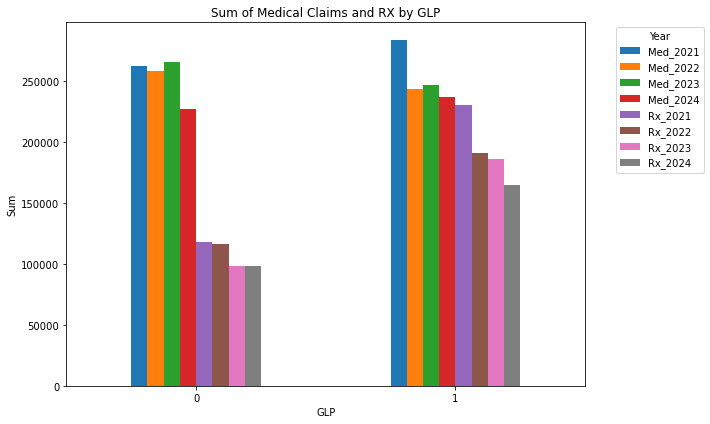

In [29]:
# Calculate sums for GLP == 1 and GLP == 0
sums = matched_members_study.groupby('GLP-1')[['Med_2021', 'Med_2022', 'Med_2023', 'Med_2024', 
                                               'Rx_2021', 'Rx_2022', 'Rx_2023', 'Rx_2024']].sum()

# Plotting
sums.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Medical Claims and RX by GLP')
plt.xlabel('GLP')
plt.ylabel('Sum')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Identify control group so these can be exported and read back into the No Wegovy Members notebook to filter for rx and medical claims.

In [30]:
controlled_members = controlled[['MEMBER_ID']]
controlled_members

,MEMBER_ID
317,15467
318,15527
319,19284
320,15766
323,16618
...,...
1494,14241
1501,14506
1508,12447
1512,14113


In [31]:
controlled_members.to_csv('matched_pairs_controlled_members_pdc_nofilter.csv', index=False)